# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score,  recall_score
import seaborn as sns

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
# 'Purchased' 열에 있는 각 값(클래스)이 몇 번 등장했는지 계산
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [4]:
# X에 데이터프레임의 2번, 3번 열(즉, 세 번째, 네 번째 열)을 선택하여 입력 특성으로 저장
X = dataset.iloc[:, [2,3]].values

# y에 데이터프레임의 4번 열(즉, 다섯 번째 열)을 선택하여 타깃 레이블로 저장
y = dataset.iloc[:, 4].values

dataset 을 Training 과 Test set 으로 분리

In [5]:
# 데이터를 학습용과 테스트용으로 분리
# X: 입력 데이터, y: 타깃 레이블
# test_size=0.2 → 전체 데이터 중 20%를 테스트 데이터로 사용
# random_state=0 → 데이터 분할 시 랜덤 시드를 고정하여 결과 재현 가능하게 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [6]:
# 표준화(정규화)를 위한 StandardScaler 객체 생성
sc = StandardScaler()

# 학습 데이터에 대해 평균과 표준편차를 계산(fit)하고, 변환(transform)하여 정규화된 데이터로 변환
X_train = sc.fit_transform(X_train)

# 테스트 데이터는 학습 데이터에서 계산한 평균과 표준편차를 사용하여 정규화
X_test  = sc.transform(X_test)

### Training set 에 대해 Logistic Regression model 을 fitting

In [7]:
# 로지스틱 회귀 분류기 생성
# solver='lbfgs'는 최적화 알고리즘 설정 (작은 데이터셋에 적합)
# random_state=0으로 고정하여 결과의 일관성 유지
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)

# 학습 데이터(X_train, y_train)를 사용하여 모델 학습
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [8]:
y_pred = lr_classifier.predict(X_test)

print("Test set의 실제 true 갯수 = ", sum(y_test))
print("모델이 예측한 true 갯수 = ", sum(y_pred))
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred)))
print("precision = {:.2f}".format(precision_score(y_test, y_pred)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred)))

Test set의 실제 true 갯수 =  22
모델이 예측한 true 갯수 =  18
accuracy = 0.93
precision = 0.94
recall = 0.77


In [9]:
# 테스트 데이터에 대한 각 클래스별 예측 확률을 계산
y_pred_proba = lr_classifier.predict_proba(X_test)

# 처음 5개의 샘플에 대해 [클래스 0 확률, 클래스 1 확률] 출력
print(y_pred_proba[:5])
print()

# 처음 5개의 샘플에 대해 '클래스 1'에 대한 예측 확률만 출력
print(y_pred_proba[:,1][:5])

[[0.87398058 0.12601942]
 [0.82305905 0.17694095]
 [0.79227189 0.20772811]
 [0.89908478 0.10091522]
 [0.89296653 0.10703347]]

[0.12601942 0.17694095 0.20772811 0.10091522 0.10703347]


In [10]:
# 예측 확률 중 '클래스 1' (즉, churn=1일 확률)만 추출
y_pred_proba_1 = y_pred_proba[:, 1]

# churn=1일 확률이 0.5보다 큰 데이터 포인트의 개수 계산
sum(y_pred_proba_1 > 0.5)

np.int64(18)

In [11]:
y_pred_proba_1 = y_pred_proba[:, 1]

THRESHOLD = 0.4
y_pred_1 = y_pred_proba_1 > THRESHOLD
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(THRESHOLD), sum(y_pred_1))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_1)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_1)))
print("f1 score = ", f1_score(y_test, y_pred_1))
print()

THRESHOLD = 0.6
y_pred_2 = y_pred_proba_1 > THRESHOLD
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(THRESHOLD), sum(y_pred_2))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_2)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_2)))
print("f1 score = ", f1_score(y_test, y_pred_2))

threshold가 0.4일 때 1 로 분류된 갯수:  23
precision = 0.83
recall = 0.86
f1 score =  0.8444444444444444

threshold가 0.6일 때 1 로 분류된 갯수:  16
precision = 1.00
recall = 0.73
f1 score =  0.8421052631578947


## confusion matrix 를 이용한 model 평가

confusion matrix
 [[17  5]
 [ 1 57]]


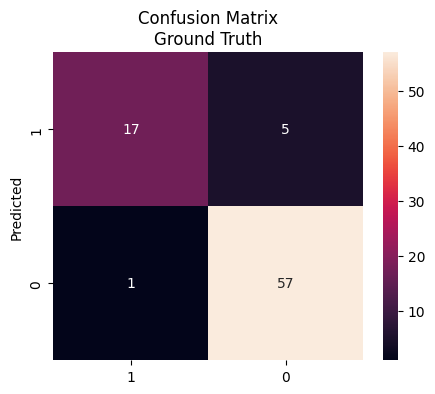

In [12]:
# 혼동 행렬(confusion matrix)을 생성
# labels=[1, 0]으로 설정하여 행렬의 순서를 [양성(1), 음성(0)] 기준으로 정렬
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 혼동 행렬 출력
print("confusion matrix\n", cm)

# 출력 시각화: 5x4 크기의 그림 생성
plt.figure(figsize=(5,4))

# seaborn을 이용한 히트맵(heatmap)으로 혼동 행렬 시각화
# annot=True: 셀 안에 숫자 표시 / fmt='d': 정수 형식 / x, y축 라벨 설정
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=[1, 0], yticklabels=[1, 0])

# y축 라벨 설정
ax.set_ylabel('Predicted')

# 그래프 제목 설정
ax.set_title('Confusion Matrix\nGround Truth')

# None을 써서 출력 결과 방해 없도록 처리 (별다른 효과는 없음)
None

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [15]:
churn_df = pd.read_csv("datasets/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [16]:
# 'tenure', 'age', 'income', 'churn' 열만 선택하여 새로운 DataFrame 구성
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]

# 앞부분 5개 행 출력 (데이터 확인용)
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1.0
1,33.0,33.0,33.0,1.0
2,23.0,30.0,30.0,0.0
3,38.0,35.0,76.0,0.0
4,7.0,35.0,80.0,0.0


In [17]:
# 'tenure', 'age', 'income' 열을 입력 특성(X)으로 설정
X = churn_df[['tenure', 'age', 'income']]

# 'churn' 열을 타깃 변수(y)로 설정
y = churn_df['churn']

### data scaling

In [ ]:
# your code here

### Train/Test dataset 분리

In [ ]:
# your code here

In [ ]:
# train the model

In [ ]:
# predict

In [ ]:
# confusion matrix 작성

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))